In [1]:
import numpy as np
from flow_torch_wrapper import Wrapper
wrapper = Wrapper()

/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [2]:
data_in = np.exp(np.array([[-17.42599444, 26.59339408, 17.38733495, 14.49584642,
  -49.24249923, -42.02752125, -13.58804331, -17.45912394]]))
wrapper.set_parameters(data_in)
data_out = wrapper.get_observations()

In [3]:
%%timeit
wrapper.set_parameters(data_in)
data_out = wrapper.get_observations()

15.7 ms ± 663 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
obesrvation = np.array([275.        , 426.15387335, 519.56162791, 476.91835845,
        434.28541983, 395.94912971, 362.91870775, 334.89754005,
        311.18588382, 291.04532441, 273.82352886, 268.90294123,
        241.65168662, 221.11548303, 205.17735169, 192.21875682,
        181.47665216, 172.42512924, 164.69119354, 158.00347887,
        152.16008627, 147.00781851, 142.42840025, 138.32909792,
        134.63621267, 133.75887286, 275.        , 331.38155396,
        370.73351276, 370.25372879, 369.63272562, 368.71390459,
        367.41485277, 365.70624488, 363.59622182, 361.11740736,
        358.31645218, 357.44852263, 351.0293995 , 343.91063015,
        336.49371946, 329.06614102, 321.78852469, 314.76080504,
        308.03975175, 301.65272745, 295.60775284, 289.90057293,
        284.51948343, 279.44855845, 274.66977245, 273.51013087,
        275.        , 154.60491207,  71.45236294,  76.70999836,
         83.21164371,  89.82079217,  96.03341936, 101.64846414,
        106.61222918, 110.94128174, 114.68346148, 115.75476827,
        121.62247161, 125.77437628, 128.63350118, 130.62182023,
        131.95983675, 132.81103707, 133.29647802, 133.50601307,
        133.50663863, 133.34859993, 133.06982694, 132.69915776,
        132.25865449, 132.14122826, 275.        , 221.8150888 ,
        185.32522539, 187.4275189 , 188.87242565, 189.94580339,
        190.81759421, 191.58603065, 192.30577855, 193.00529174,
        193.69746946, 193.90470667, 195.2797671 , 196.62391099,
        197.88852785, 199.04501582, 200.07312514, 200.9629336 ,
        201.71241553, 202.32504753, 202.80784368, 203.16987678,
        203.42122425, 203.57225232, 203.63313486, 203.63785925])
print(len(obesrvation))
times = np.array([0., 10., 17., 27., 37., 47., 57., 67., 77., 87., 97.,
                  100., 120., 140., 160., 180., 200., 220., 240., 260., 280., 300.,
                  320., 340., 360., 365.])


# noise model:  sigma ** 2 * np.exp(-((time_points[i] - time_points[j]) ** 2) / (2 * length ** 2))
noise_corr_length = 30
noise_sigma = 5

prior_mean = np.exp(np.array([-16, 26, 17, 16, -48, -41, -14, -16], dtype=np.float32))
prior_std = np.array([2, 2, 2, 2, 2, 2, 2, 2], dtype=np.float32)

104


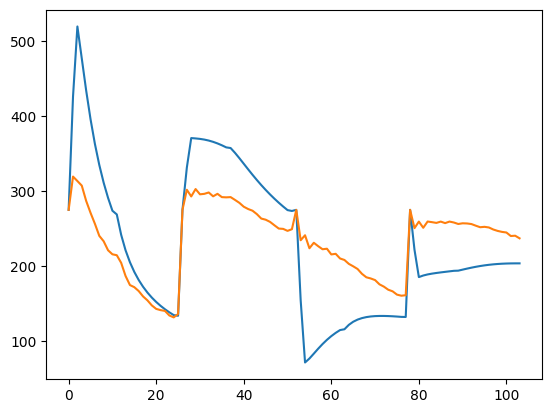

In [10]:
import matplotlib.pyplot as plt
prior_mean = np.array([-16, 26, 17, 16, -48, -41, -14, -16], dtype=np.float32)
prior_std = np.array([2, 2, 2, 2, 2, 2, 2, 2], dtype=np.float32)
wrapper.set_parameters(np.exp(prior_mean))
data_out = wrapper.get_observations()
plt.plot(obesrvation)
plt.plot(data_out.T)

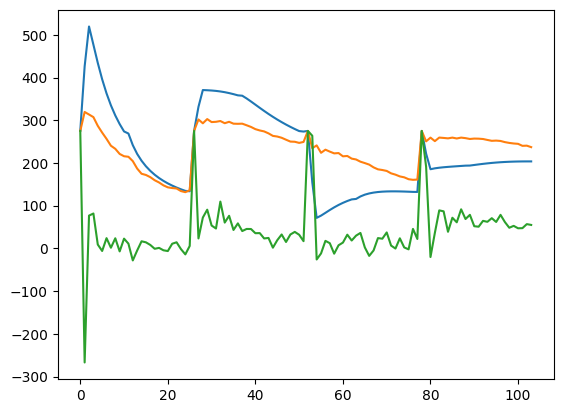

In [11]:
par_test = np.array([6.60243737748997e-07,293416616036.14124,2148749293.8770103,171301.72918557315,1.769035421754842e-21,1.7163676057389491e-18,3.5226868184140496e-05,2.1501119213066406e-08])
wrapper.set_parameters(par_test)
obs_test = wrapper.get_observations()
plt.plot(obesrvation)
plt.plot(data_out.T)
plt.plot(obs_test.T)

In [12]:
np.log(par_test)


array([-14.23065677,  26.40485933,  21.48815179,  12.05118178,
       -47.78385251, -40.90632147, -10.25370147, -17.65516085])

In [13]:
prior_mean

array([-16.,  26.,  17.,  16., -48., -41., -14., -16.], dtype=float32)